In [54]:
import pandas as pd # Veri işleme ve analiz için
import numpy as np # Sayısal hesaplamalar için
import seaborn as sns # Görselleştirme için
import matplotlib.pyplot as plt # Grafik çizimleri için

# Makine öğrenmesi modelleri
import xgboost as xgb  #XGBoost modeli
from sklearn.svm import SVC  # Support Vector Machine
from sklearn.tree import DecisionTreeClassifier # Karar ağacı
from sklearn.neighbors import KNeighborsClassifier  # K-en yakın komşu
from sklearn.ensemble import RandomForestClassifier  # Rastgele orman
from sklearn.linear_model import LogisticRegression  # Lojistik regresyon

# Ön işleme (kategorik verileri sayısal verilere dönüştürmek için ve
# Kategorik verileri sayısal verilere dönüştürmek için
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Veriyi eğitim ve test olarak ayırma
from sklearn.model_selection import train_test_split

# Model değerlendirme metrikleri
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve


In [55]:
df = pd.read_csv("heart.csv") #Veri setini okumak için read komutu kullandık
df.head() #ilk 5 satırını görüntüler

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [56]:
(df.info()) #Veri setinin genel yapısı hakkında bilgi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [57]:
print(df.isnull().sum()) #Eksik Veri Kontrolü

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [58]:
df.dtypes #Veri setindeki her sütunun veri tiplerini görüntüler

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [59]:
#Kategorik Değişkenler
kategorik = df.select_dtypes(include='object')

print("Kategorik değişkenler:", kategorik.columns.tolist())

Kategorik değişkenler: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [60]:
#Sayısal Değişkenler
sayisal = df.select_dtypes(include='number')
print("Sayısal değişkenler:", sayisal.columns.tolist())

Sayısal değişkenler: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


In [61]:
#HeartDisease Değişkenini Label Encode Etme
#Yes' ve 'No' değerlerini 1 ve 0 olarak dönüştürüyoruz
lb = LabelEncoder()  #LabelEncoder nesnesi oluşturuluyor
df['HeartDisease'] = lb.fit_transform(df['HeartDisease'])  


# Kategorik Verileri Encode Etme 
df = pd.get_dummies(df, columns=kategorik.columns.drop(["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]), drop_first=True)

# Sayısal Verileri Ölçekleme
scaler = StandardScaler() 
scaled_columns = ["Age","RestingBP","Cholesterol","FastingBS",
                  "MaxHR","Oldpeak"]
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])# Seçilen sütunlara ölçekleme işlemi uygulanır

In [62]:
df  #Bütün işlemeri yaptıktan sonra veri setimizi kontrol ediyoruz

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,M,ATA,0.410909,0.825070,-0.551341,Normal,1.382928,N,-0.832432,Up,0
1,-0.478484,F,NAP,1.491752,-0.171961,-0.551341,Normal,0.754157,N,0.105664,Flat,1
2,-1.751359,M,ATA,-0.129513,0.770188,-0.551341,ST,-1.525138,N,-0.832432,Up,0
3,-0.584556,F,ASY,0.302825,0.139040,-0.551341,Normal,-1.132156,Y,0.574711,Flat,1
4,0.051881,M,NAP,0.951331,-0.034755,-0.551341,Normal,-0.581981,N,-0.832432,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,M,TA,-1.210356,0.596393,-0.551341,Normal,-0.188999,N,0.293283,Flat,1
914,1.536902,M,ASY,0.627078,-0.053049,1.813758,Normal,0.164684,N,2.357094,Flat,1
915,0.370100,M,ASY,-0.129513,-0.620168,-0.551341,Normal,-0.857069,Y,0.293283,Flat,1
916,0.370100,F,ATA,-0.129513,0.340275,-0.551341,LVH,1.461525,N,-0.832432,Flat,1


In [63]:
X = df.drop(columns=["HeartDisease"]) #(HeartDisease) dışındaki tüm sütunlar özellik olarak seçilir
y = df['HeartDisease'] #(HeartDisease) seçilir

In [64]:
# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [65]:
reports = [] #Daha sonrasında modelleri karşılaştırmak için liste oluşturduk

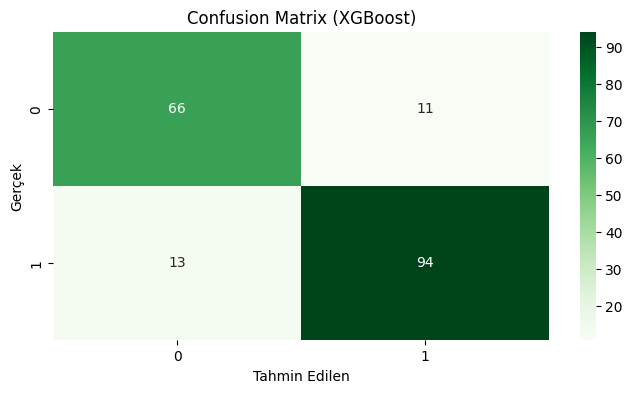

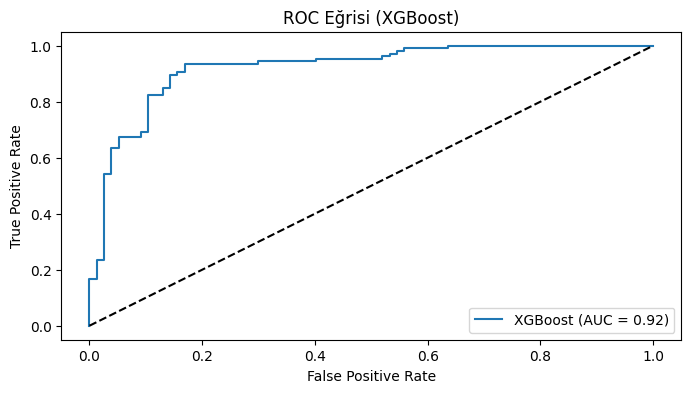

ROC AUC: 0.9211


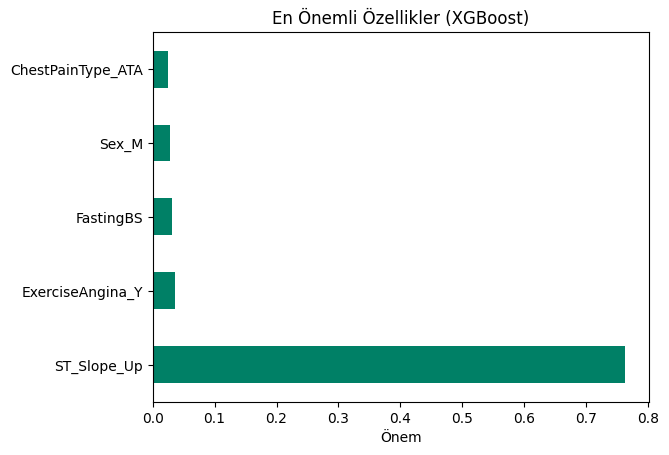

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



In [66]:

# Özellik ve hedef değişkenlerini ayırma
X = df_encoded.drop("HeartDisease", axis=1)
y = df_encoded["HeartDisease"]

# Eğitim ve test verisine ayırma
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli eğitmek, tahmin yapmak, değerlendirmek (XGBoost)

# Modeli Eğitme
xgb_model = xgb.XGBClassifier()  # XGBoost sınıflandırıcı nesnesi oluşturuluyor
xgb_model.fit(X_train, y_train)  # Eğitim verisi ile model eğitiliyor

# Test Verisinde Tahmin Yapma
y_pred = xgb_model.predict(X_test) # Test verisi ile tahmin yapılıyor

# Değerlendirme
confusionMatrix = confusion_matrix(y_test, y_pred)  # Karışıklık matrisi hesaplanıyor
# Karışıklık matrisi, TP,FP,TN ve FN sonuçları içerir.

classReport = classification_report(y_test, y_pred)  # Sınıflandırma raporu çıkarılıyor
# Precision, recall, F1 skoru ve doğruluk gibi metrikleri gösterir.

reports.append(classification_report(y_test, y_pred, output_dict=True)) 
 # Sonuçlar karşılaştırma listesine ekleniyor

y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]  # Pozitif sınıf için olasılık değerleri alınıyor
# Test verisinde her bir örneğin pozitif sınıf olma olasılığ (1)hesaplanıyor.

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)  # ROC eğrisi için gerekli metrikler hesaplanıyor
# False Positive Rate ve True Positive Rate hesaplanarak ROC eğrisi çizilecektir.

rocScore = roc_auc_score(y_test, y_pred_prob)  # ROC AUC skoru hesaplanıyor
# ROC eğrisinin altındaki alanı hesaplar, yüksek AUC skoru iyi performansı gösterir.

# Confusion Matrix Çizme
plt.figure(figsize=(8,4)) # Grafik boyutunu ayarla
sns.heatmap(confusionMatrix,annot=True,fmt="d",cmap="Greens") # Isı haritası çiz, değerleri göster, tam sayı formatında, yeşil tonlarında
plt.title("Confusion Matrix (XGBoost)") # Grafik başlığı
plt.xlabel("Tahmin Edilen") # X ekseni etiketi
plt.ylabel("Gerçek") # Y ekseni etiketi
plt.show() # Grafiği göster

# ROC Eğrisini Çizme
plt.figure(figsize=(8,4))  # Grafik boyutu 8x4 olarak ayarlanır
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {rocScore:.2f})')  
# ROC eğrisi çizilir ve etiket olarak AUC değeri eklenir
plt.plot([0, 1], [0, 1], 'k--')  
# Rastgele tahmin eğrisini temsil eden diyagonal çizilir
plt.xlabel('False Positive Rate')  # X ekseni adı: Yanlış Pozitif Oranı
plt.ylabel('True Positive Rate')  # Y ekseni adı: Doğru Pozitif Oranı
plt.title('ROC Eğrisi (XGBoost)')  # Grafik başlığı belirlenir
plt.legend()  # Eğri etiketi (AUC değeri) gösterilir
plt.show()  # Grafiği ekrana çizdir

print(f"ROC AUC: {rocScore:.4f}")  
# AUC skoru terminale yazdırılır, modelin genel başarı seviyesi özetlenir


# En Önemli Özellikleri Belirtme
importances = xgb_model.feature_importances_ # Eğitilmiş XGBoost modelinden özellik önem skorlarını al
features = X.columns # Orijinal veri setindeki özellik (sütun) isimlerini al
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False).head(5)
 # Özellik önem skorlarını bir Pandas Serisine dönüştür,
 # özellik isimleriyle eşleştir, azalan sıraya göre sırala ve en önemli ilk 10 özelliği seç
feat_importance.plot(kind='barh',cmap="summer") 
# En önemli 5 özelliği yatay çubuk grafik olarak çiz, "summer" renk haritasını kullan
plt.title(f"En Önemli Özellikler (XGBoost)") # Grafik başlığını ayarla
plt.xlabel("Önem") # X ekseni etiketini ayarla
plt.show() # Grafiği göster

#Raporu Gösterme
print(classReport) # Sınıflandırma raporunu (precision, recall, f1-score vb.) konsola yazdır

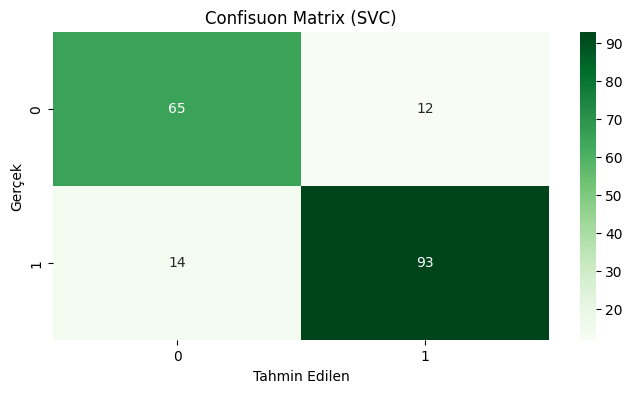

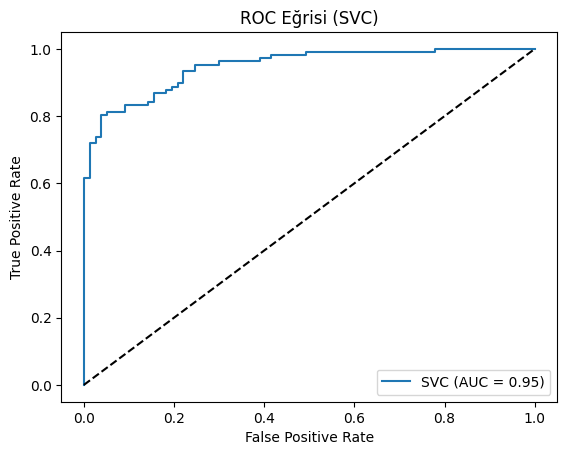

ROC AUC: 0.9472
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [67]:
#Modeli eğitmek, tahmin yapmak, değerlendirmek (SVC)

# Modeli Eğitme
svc_model = SVC(probability=True) 
#(Support Vector Classifier) modelini oluşturuyoruz 
#ve olasılık tahmini yapılabilmesi için 'probability=True' ekliyoruz.
svc_model.fit(X_train, y_train) # Modeli eğitim verisiyle eğitiyoruz.

# Test Verisinde Tahmin Yapma
y_pred = svc_model.predict(X_test)

# Değerlendirme
confusionMatrix = confusion_matrix(y_test, y_pred)
classReport = classification_report(y_test, y_pred,zero_division=True) #Sınıflandırma raporu
reports.append(classification_report(y_test, y_pred,zero_division=True,output_dict=True))
#raporu sözlük formatında listeye ekle
y_proba = svc_model.predict_proba(X_test)[:, 1]  # Pozitif sınıfın olasılıkları
fpr, tpr, thresholds = roc_curve(y_test, y_proba)#roc eğrisi için gerekli olan fpr,tpr,eşik değer
rocScore = roc_auc_score(y_test, y_proba) #roc auc hesaplaması

# Confusion Matrix Çizme
plt.figure(figsize=(8,4))
sns.heatmap(confusionMatrix,annot=True,fmt="d",cmap="Greens")
plt.title("Confisuon Matrix (SVC)")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

# ROC Eğrisini Çizme
plt.plot(fpr, tpr, label=f'SVC (AUC = {rocScore:.2f})')#Roc eğrisi çizimi
plt.plot([0, 1], [0, 1], 'k--')# Rastgele sınıflandırıcıya ait referans çizgisi
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi (SVC)')
plt.legend()
plt.show()

print(f"ROC AUC: {rocScore:.4f}") #skoru yazdırıyoruz

#Raporu Gösterme
print(classReport)

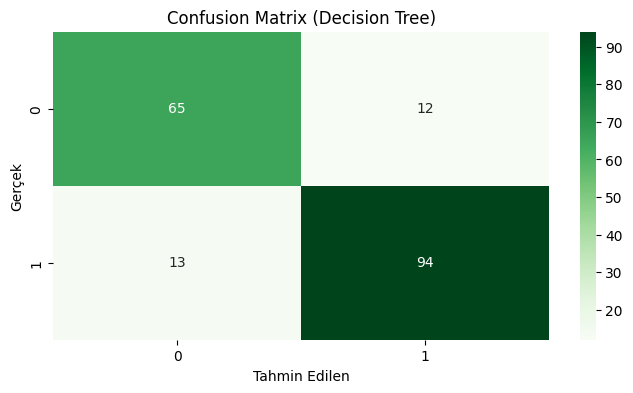

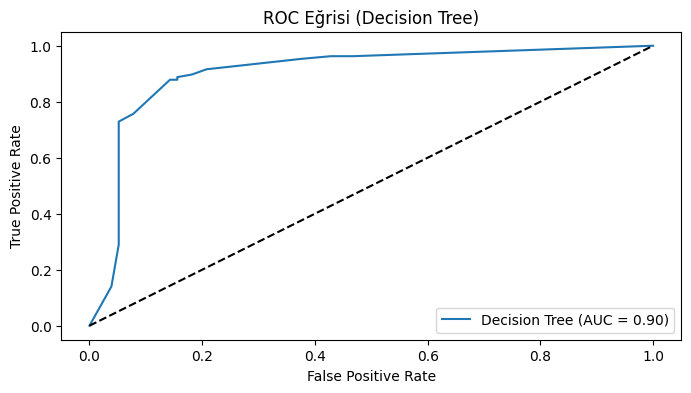

ROC AUC: 0.9036


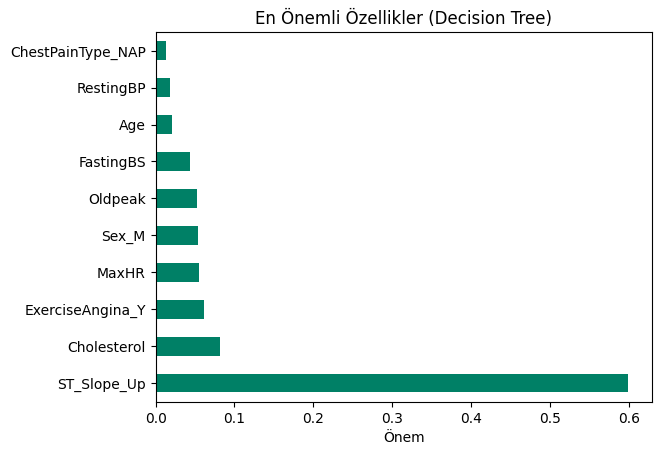

              precision    recall  f1-score   support

           0       0.83      0.84      0.84        77
           1       0.89      0.88      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [68]:
# Modeli eğitmek, tahmin yapmak, değerlendirmek (Decision Tree)

# Modeli Eğitme
decT_model = DecisionTreeClassifier(max_depth=5,min_samples_split=10) # Performansı arttırmak için
decT_model.fit(X_train, y_train)

# Test Verisinde Tahmin Yapma
y_pred = decT_model.predict(X_test)

# Değerlendirme
confusionMatrix = confusion_matrix(y_test, y_pred)
classReport = classification_report(y_test, y_pred)
reports.append(classification_report(y_test, y_pred,output_dict=True))
y_pred_prob = decT_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
rocScore = roc_auc_score(y_test, y_pred_prob)

# Confusion Matrix Çizme
plt.figure(figsize=(8,4))
sns.heatmap(confusionMatrix,annot=True,fmt="d",cmap="Greens")
plt.title("Confusion Matrix (Decision Tree)")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

# ROC Eğrisini Çizme
plt.figure(figsize=(8,4))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {rocScore:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi (Decision Tree)')
plt.legend()
plt.show()

print(f"ROC AUC: {rocScore:.4f}")

# En Önemli Özellikleri Belirtme
importances = decT_model.feature_importances_
features = X.columns
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False).head(10)
feat_importance.plot(kind='barh',cmap="summer")
plt.title(f"En Önemli Özellikler (Decision Tree)")
plt.xlabel("Önem")
plt.show()

#Raporu Gösterme
print(classReport)

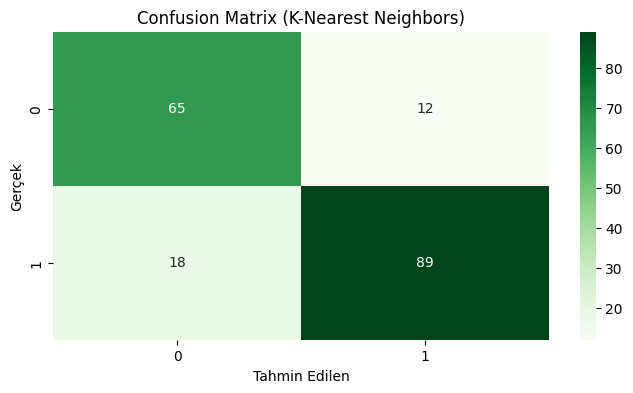

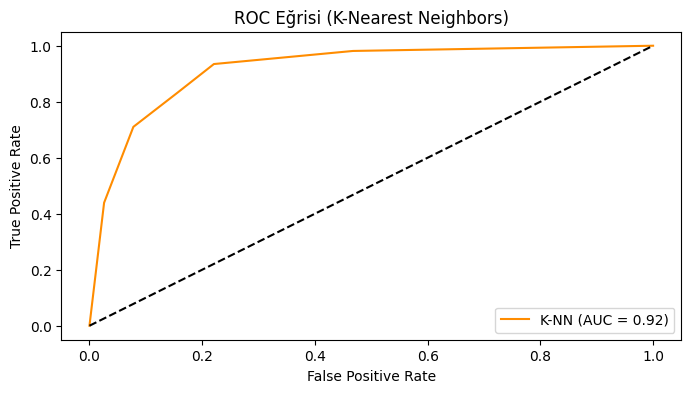


ROC AUC: 0.9169
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        77
           1       0.88      0.83      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184



In [69]:
# Modeli eğitmek, tahmin yapmak, değerlendirmek (K-Nearest Neighbors)

# Modeli Eğitme
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Test Verisinde Tahmin Yapma
y_pred = knn_model.predict(X_test)

# Değerlendirme
confusionMatrix = confusion_matrix(y_test, y_pred)
classReport = classification_report(y_test, y_pred, zero_division=True)
reports.append(classification_report(y_test, y_pred, zero_division=True,output_dict=True))
y_proba = knn_model.predict_proba(X_test)[:, 1]  # Pozitif sınıfın olasılıkları
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
rocScore = roc_auc_score(y_test, y_proba)

# Confusion Matrix Çizme
plt.figure(figsize=(8,4))
sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix (K-Nearest Neighbors)")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

# ROC Eğrisini Görselleştirme
plt.figure(figsize=(8,4))
plt.plot(fpr, tpr, label=f'K-NN (AUC = {rocScore:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi (K-Nearest Neighbors)')
plt.legend()
plt.show()

print(f"\nROC AUC: {rocScore:.4f}")

# Raporu Gösterme
print(classReport)

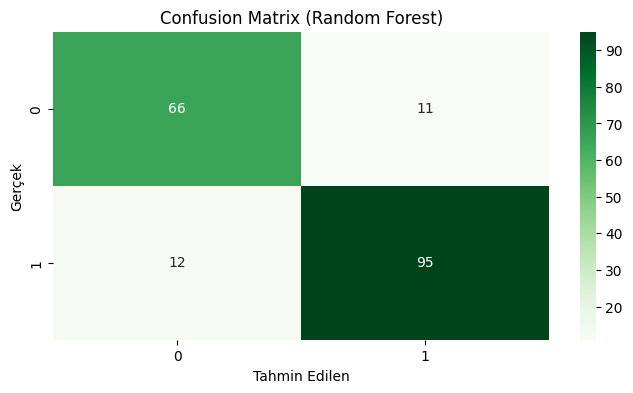

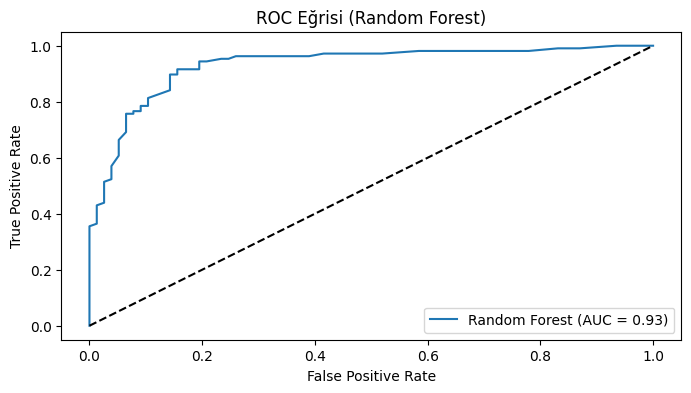

ROC AUC: 0.9298


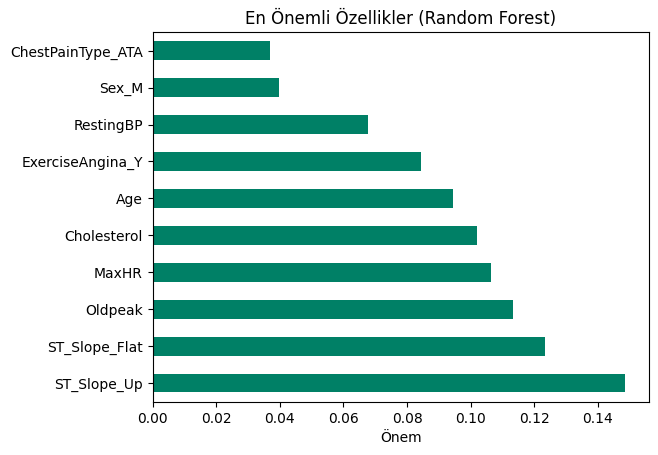

              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



In [70]:
# Modeli eğitmek, tahmin yapmak, değerlendirmek (Random Forest)

# Modeli Eğitme
rndF_model = RandomForestClassifier()
rndF_model.fit(X_train, y_train)

# Test Verisinde Tahmin Yapma
y_pred = rndF_model.predict(X_test)

# Değerlendirme
confusionMatrix = confusion_matrix(y_test, y_pred)
classReport = classification_report(y_test, y_pred)
reports.append(classification_report(y_test, y_pred,output_dict=True))
y_pred_prob = rndF_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
rocScore = roc_auc_score(y_test, y_pred_prob)

# Confusion Matrix Çizme
plt.figure(figsize=(8,4))
sns.heatmap(confusionMatrix,annot=True,fmt="d",cmap="Greens")
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

# ROC Eğrisini Çizme
plt.figure(figsize=(8,4))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {rocScore:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi (Random Forest)')
plt.legend()
plt.show()

print(f"ROC AUC: {rocScore:.4f}")

# En Önemli Özellikleri Belirtme
importances = rndF_model.feature_importances_
features = X.columns
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False).head(10)
feat_importance.plot(kind='barh',cmap="summer")
plt.title(f"En Önemli Özellikler (Random Forest)")
plt.xlabel("Önem")
plt.show()

#Raporu Gösterme
print(classReport)

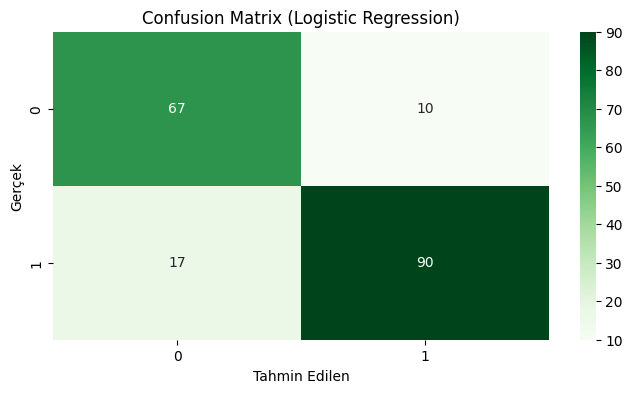

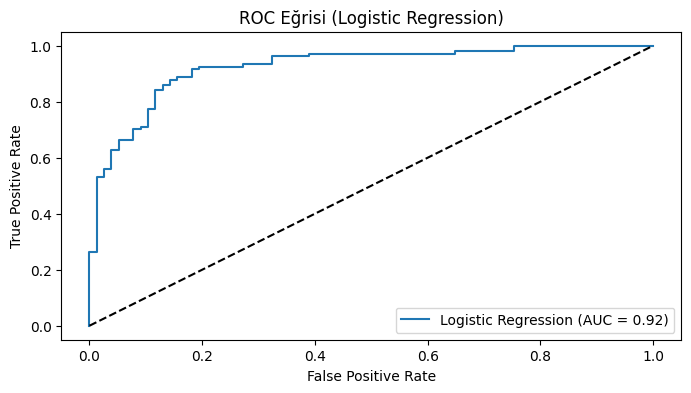

ROC AUC: 0.9241
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



In [71]:
# Modeli eğitmek, tahmin yapmak, değerlendirmek (Logistic Regression)

# Modeli Eğitme
log_model = LogisticRegression(max_iter=8500,solver="saga",fit_intercept=True)
# model.n_iter_ ile kontrol yaptık 7930 çıkıyor %10da pay verdik o yüzden 8500 iter yaptık
# solver = "saga" ise saga daha büyük veri setlerinde olduğu için
log_model.fit(X_train, y_train)

# Test Verisinde Tahmin Yapma
y_pred = log_model.predict(X_test)

# Değerlendirme
confusionMatrix = confusion_matrix(y_test, y_pred)
classReport = classification_report(y_test, y_pred,zero_division=True)
reports.append(classification_report(y_test, y_pred,zero_division=True,output_dict=True))
y_pred_prob = log_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
rocScore = roc_auc_score(y_test, y_pred_prob)

# Confusion Matrix Çizme
plt.figure(figsize=(8,4))
sns.heatmap(confusionMatrix,annot=True,fmt="d",cmap="Greens")
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

# ROC Eğrisini Çizme
plt.figure(figsize=(8,4))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {rocScore:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi (Logistic Regression)')
plt.legend()
plt.show()

print(f"ROC AUC: {rocScore:.4f}")

#Raporu Gösterme
print(classReport)

In [72]:
# 1. Örnek bir kişi tanımlayalım
ornek_kisi = {
    'Age': 60,
    'Sex': 'M',
    'ChestPainType': 'ASY',
    'RestingBP': 140,
    'Cholesterol': 200,
    'FastingBS': 0,
    'RestingECG': 'Normal',
    'MaxHR': 150,
    'ExerciseAngina': 'Y',
    'Oldpeak': 1.5,
    'ST_Slope': 'Flat'
}

# 2. DataFrame'e dönüştür
ornek_df = pd.DataFrame([ornek_kisi])

# 3. Eğitimde yapılan kategorik dönüşümler
ornek_df_encoded = pd.get_dummies(ornek_df)

# 4. Eğitimdeki dummy kolonları ile aynı sırada olmalı (eksik olanlar 0 olarak eklenir)
for col in X_train.columns:
    if col not in ornek_df_encoded.columns:
        ornek_df_encoded[col] = 0

# Sıralamayı X_train ile aynı yap
ornek_df_encoded = ornek_df_encoded[X_train.columns]

# 5. StandardScaler ile ölçekleme (eğitimde kullanılan scaler kullanılmalı)
ornek_df_scaled = scaler.transform(ornek_df_encoded)

# 6. Tahmin yap
tahmin = xgb_model.predict(ornek_df_scaled)
tahmin_olasilik = xgb_model.predict_proba(ornek_df_scaled)

# 7. Sonuç
if tahmin[0] == 1:
    print("Tahmin: Kalp hastalığı riski VAR")
else:
    print("Tahmin: Kalp hastalığı riski YOK")

print(f"Hastalık riski olasılığı: %{tahmin_olasilik[0][1]*100:.2f}")

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ChestPainType_ATA
- ChestPainType_NAP
- ChestPainType_TA
- ExerciseAngina_Y
- RestingECG_Normal
- ...
